In [23]:
import scipy.stats as st
import numpy as np
import pandas as pd
from scipy.optimize import minimize

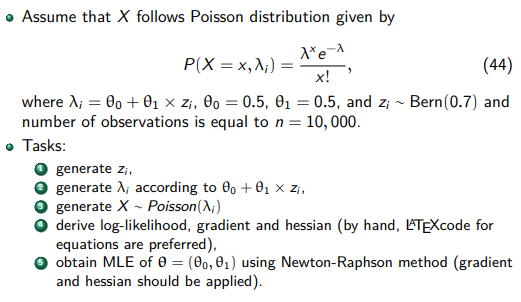

In [44]:
n=10000
p=0.7

zi=st.bernoulli(p).rvs(n)

lam=[]
for i in zi: lam.append(0.5+0.5*i)

x=st.poisson.pmf(0,lam)


In [45]:
## python does minimization so we need to have -logL
def ll(par,x):
  m =np.sum(x)*np.log(par)-par-len(x)
  return -m

## gradient
def grad(par,x):
  g = (np.sum(x) / par) / (-1)
  return -g

## hessian
def hess(par,x):
  h = -np.sum(x)/(par**2) 
  return h

res = minimize(fun=ll, x0=[0.5], method = "Newton-CG", jac = grad, hess = hess, args = (x))
res

     fun: array([13052.3315264])
     jac: array([8805.72441754])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 15
    nhev: 1
     nit: 0
    njev: 3
  status: 2
 success: False
       x: array([0.5])